<a href="https://colab.research.google.com/github/Aruna-G-K/arprogram2/blob/main/Copy_of_train_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
HOME = '/content/drive/MyDrive'
print(HOME)

/content/drive/MyDrive


In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/107.7 GB disk)


Prepare Dataset

In [4]:
%cd {HOME}




/content/drive/MyDrive


In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00


In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="1aFHZ35UxOAov8ho6T8g")
project = rf.workspace("project-ch1aj").project("vehicle-detection-swchc")
version = project.version(8)
dataset = version.download("yolov8")







ModuleNotFoundError: No module named 'roboflow'

In [ ]:
!pwd

/content/drive/MyDrive


Training


In [6]:
!yolo task=detect mode=train model=yolov8s.pt data={HOME}/Vehicle-Detection-8/data.yaml epochs=50 imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 138MB/s] 
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 420, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 97, in __init__
    self._load(model, task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 149, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 628, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
                   ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 567, in torch_

Confusion Matrix

In [7]:
!yolo task=detect mode=train resume model=/content/drive/MyDrive/runs/detect/train/weights/last.pt data={HOME}/Vehicle-Detection-8/data.yaml epochs=7 imgsz=640 project=/content/drive/MyDrive/runs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 420, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 97, in __init__
    self._load(model, task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 149, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 628, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
                   ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 567, in torch_safe_load
    return torch.load(file, map

/content/drive/MyDrive


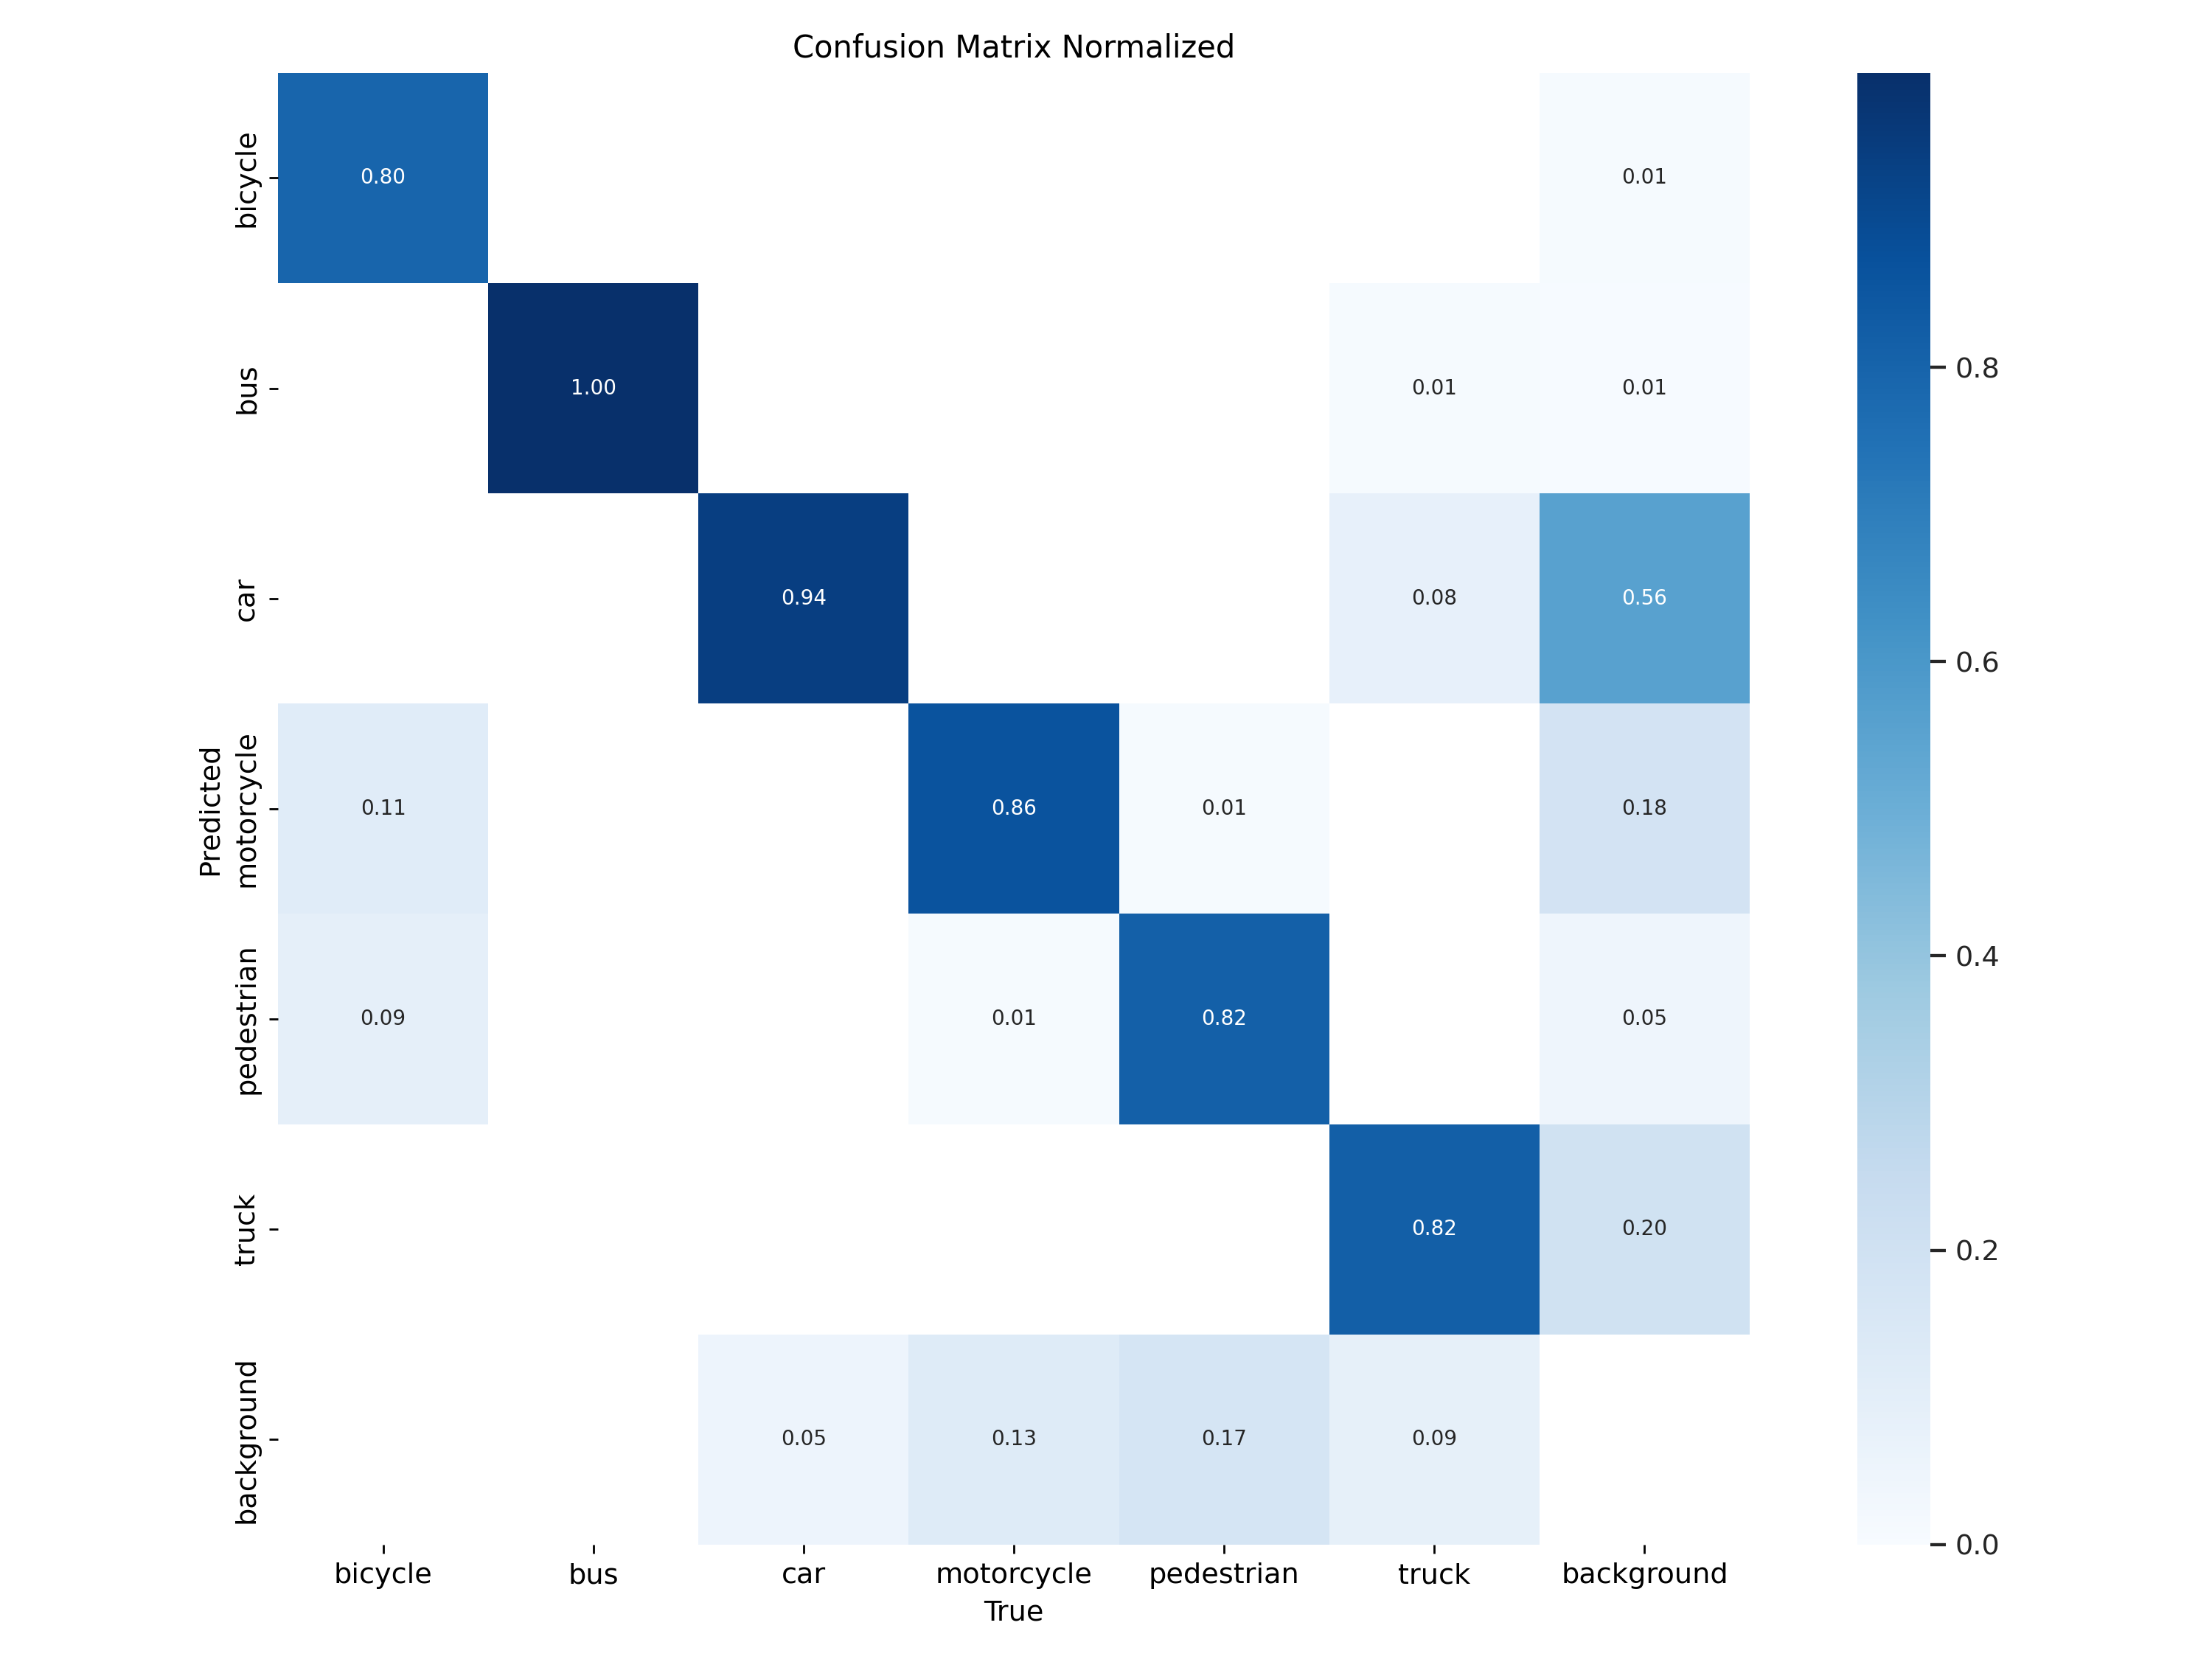

In [ ]:
from IPython.display import display, Image
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=600)

Validation

/content/drive/MyDrive


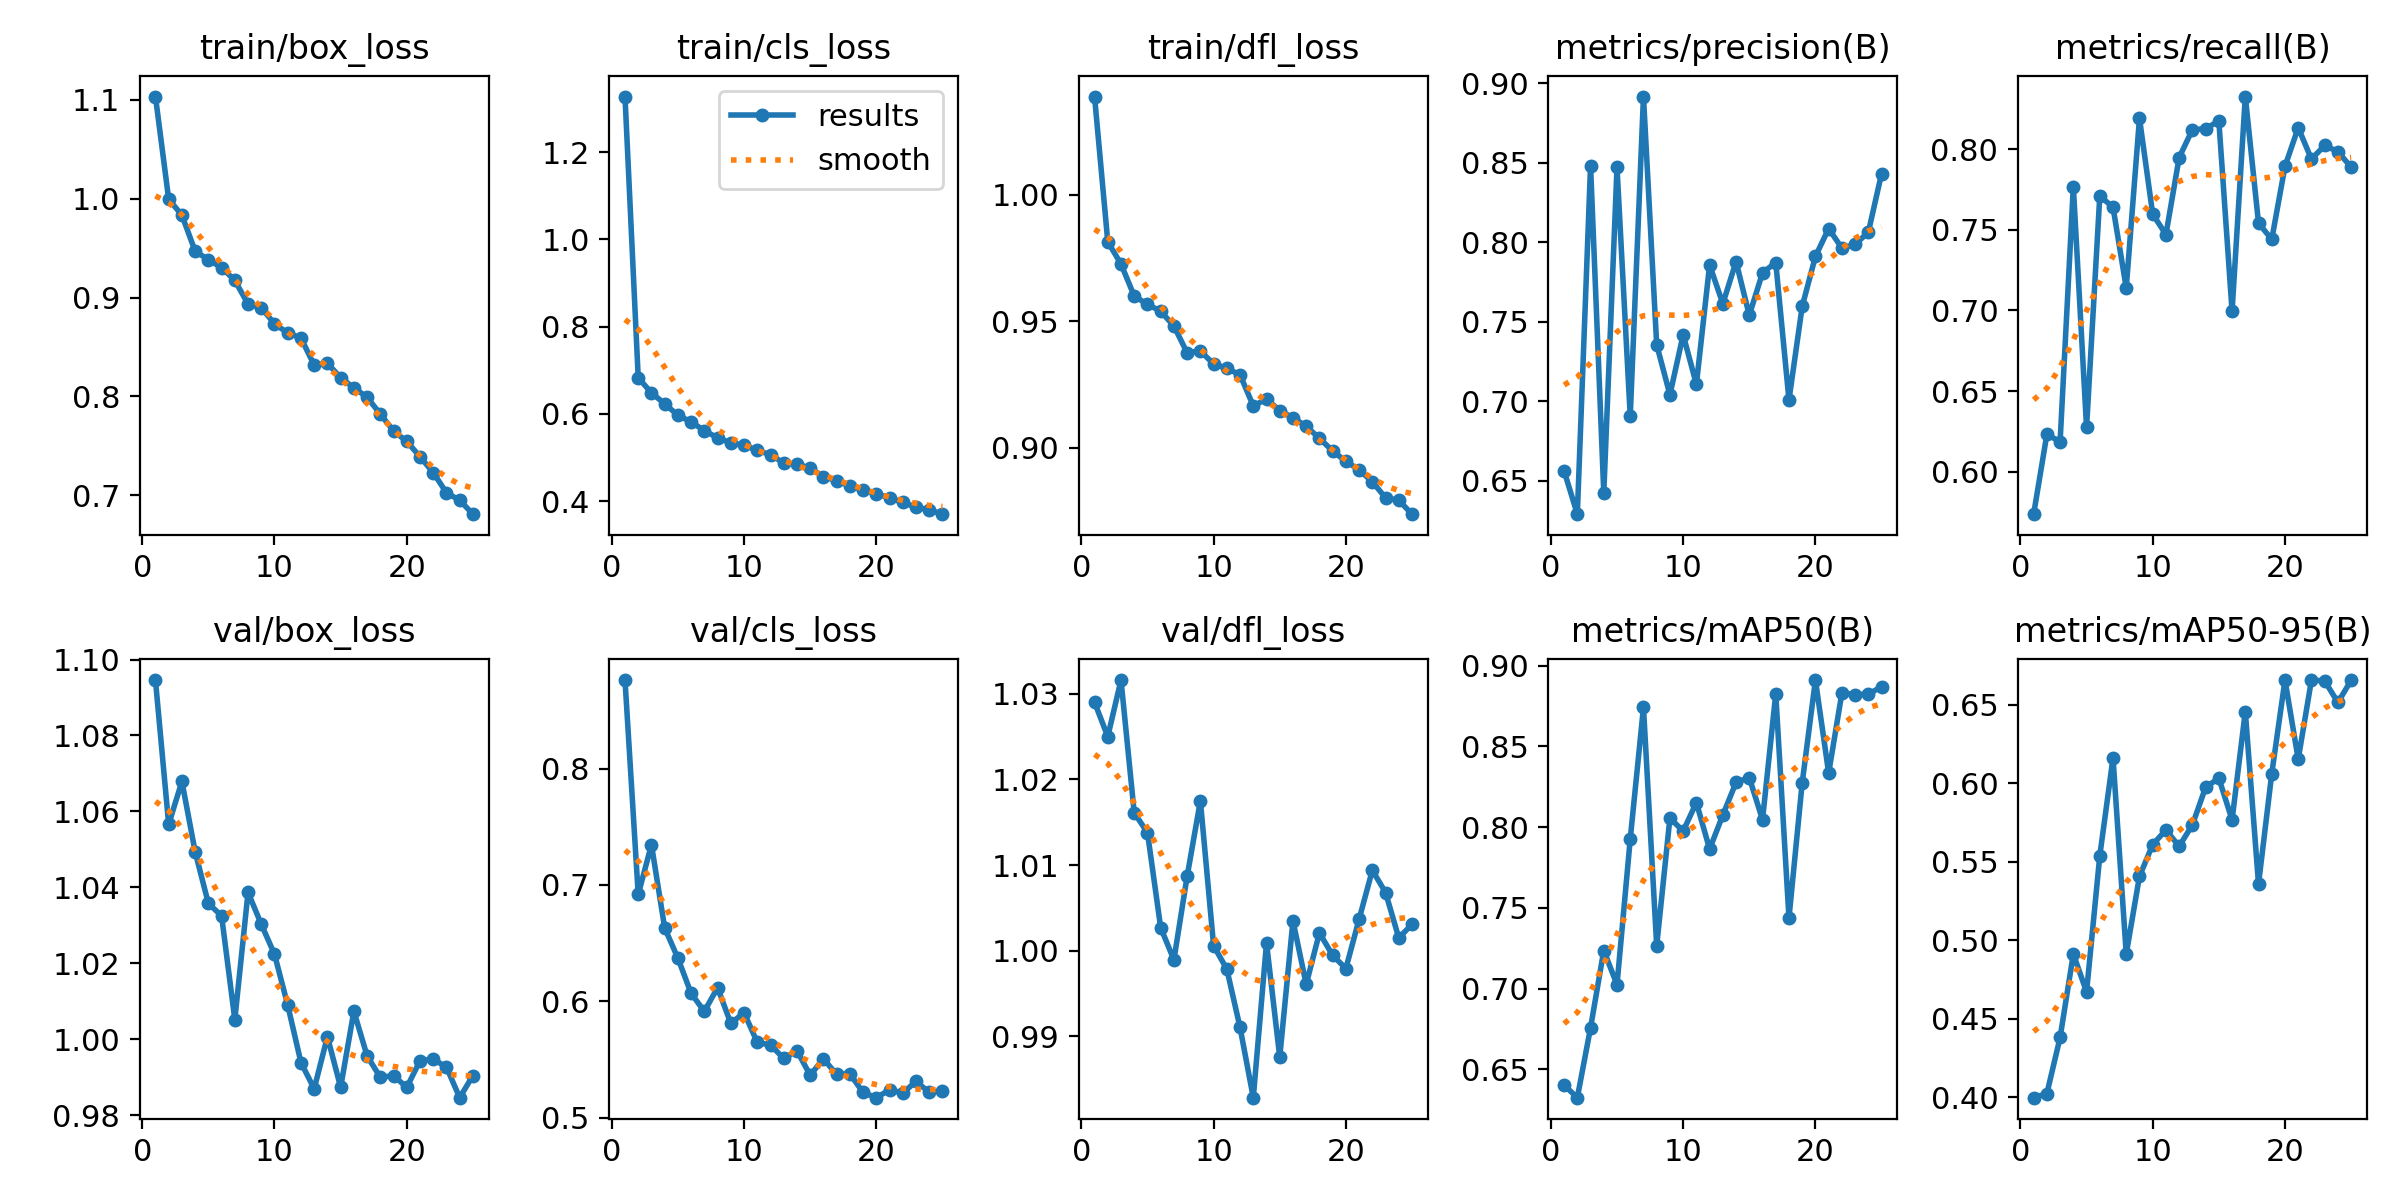

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
!yolo val model=/content/drive/MyDrive/Evaluation_Result/YOLOv8_Validation/After_Validation/weights/best.pt data=/content/drive/MyDrive/Vehicle-Detection-7/data.yaml imgsz=640 batch=16 device=0

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Vehicle-Detection-7/valid/labels.cache... 240 images, 0 backgrounds, 0 corrupt: 100% 240/240 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:13<00:00,  1.10it/s]
                   all        240       3817      0.858       0.82      0.887      0.654
               bicycle        240         47      0.822      0.785      0.851      0.692
                   bus        240         25      0.933          1      0.993      0.867
                   car        240       2685      0.923      0.906      0.961       0.77
            motorcycle        240        597      0.916      0.772      0.907      0.544
            pedestrian        240         96      0.767      0.685      0.763      0.447
                 truck  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Model Prediction

Prediction Results

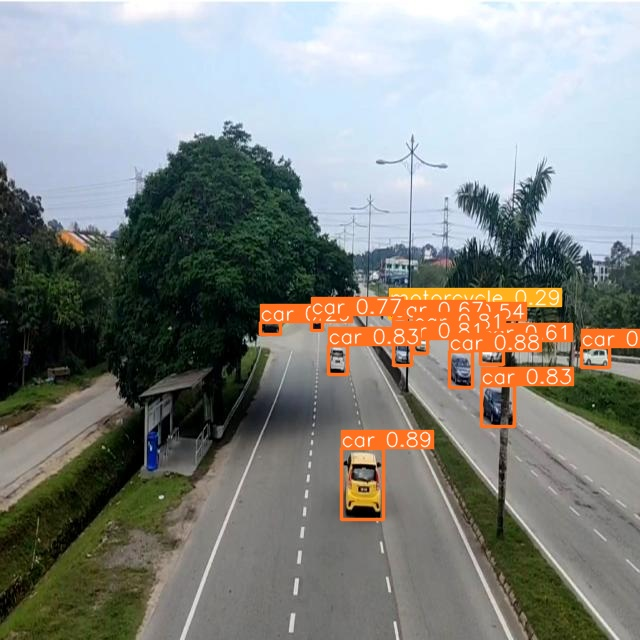

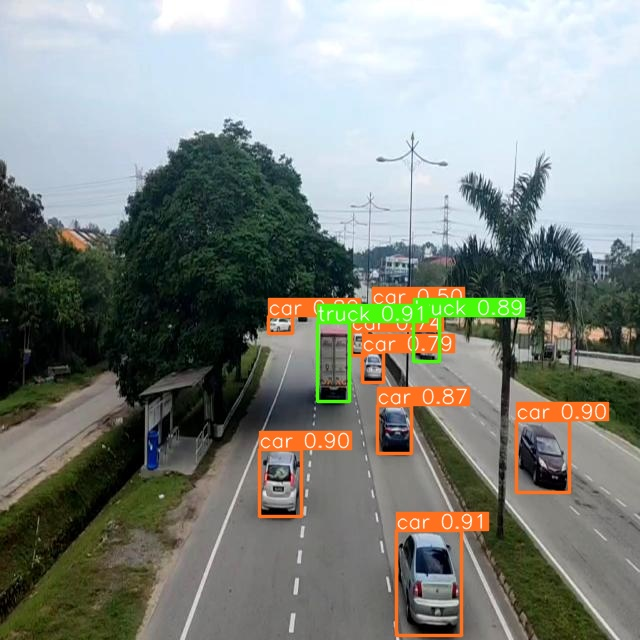

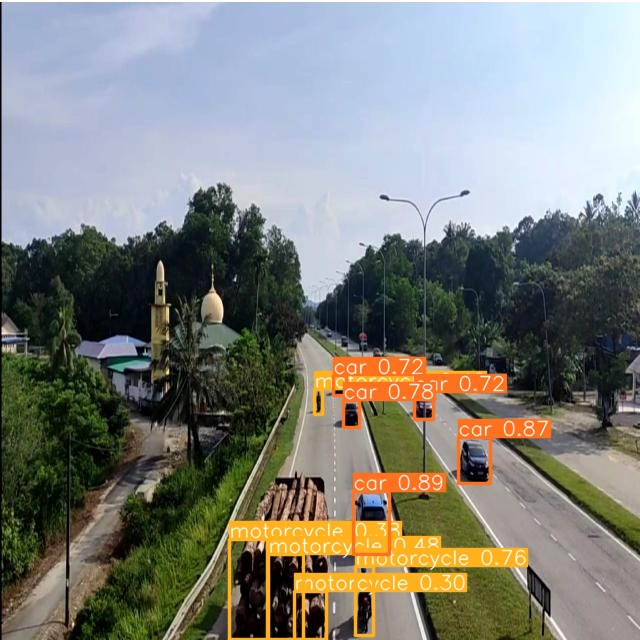

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

Model Evaluation

In [ ]:
!yolo val model=/content/drive/MyDrive/car_detection/car_model_yolov8/exp/weights/best.pt data=data.yaml split=test

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
100% 755k/755k [00:00<00:00, 14.9MB/s]
val: Scanning /content/drive/MyDrive/Vehicle-Detection-7/test/labels.cache... 240 images, 0 backgrounds, 0 corrupt: 100% 240/240 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:29<00:00,  2.00s/it]
                   all        240       4939      0.873      0.844      0.885      0.658
               bicycle        240         73      0.846      0.945       0.92      0.763
                   bus        240         29       0.98      0.931       0.95      0.769
                   car        240       3409      0.918      0.918      0.964      0.787
            motorcycle        240        897      0.902      0.803      0.898      0.558
            pedestrian        240        152        0.8      0.633      0.7